아래 셀을 먼저  실행 해 주세요

In [ ]:
!pip install  fitz -qq
!pip install  PyMuPDF -qq
!pip install pytesseract opencv-python pillow numpy -qq
!apt-get install tesseract-ocr -qq
!apt-get install tesseract-ocr-kor -qq
!pip install tqdm -qq
!pip install nltk -qq
!pip install transformers -qq
!pip install easyocr -qq

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import fitz  # PyMuPDF
import cv2
import pytesseract
from PIL import Image
import numpy as np

from tqdm import tqdm
import nltk

def summarize_text(text, model, tokenizer):
    # 전체 진행 상태를 표시하기 위한 tqdm 바 생성
    steps = 3  # 전체 3단계 (토크나이징, 생성, 디코딩)
    with tqdm(total=steps, desc="Overall Progress", ncols=100) as pbar:
        # 토크나이징
        prefix = "summarize: "
        inputs = [prefix + text]
        inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors="pt")
        pbar.update(1)  # 첫 번째 단계 완료 후 진행률 업데이트

        # 생성
        output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)
        pbar.update(1)  # 두 번째 단계 완료 후 진행률 업데이트

        # 디코딩
        decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
        result = nltk.sent_tokenize(decoded_output.strip())[0]
        pbar.update(1)  # 세 번째 단계 완료 후 진행률 업데이트

    return result


# pdf - > text 추출
def extract_text_from_pdf(file_path):
    doc = fitz.open(file_path)
    content = ''
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        content += page.get_text()
    return content

# 이미지 -> 텍스트 추출
from glob import glob
import easyocr
import cv2
import matplotlib.pyplot as plt


def extract_text_from_image(image_path,showimages = False):
  # 이미지 불러오기
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # OCR 모델 초기화
  reader = easyocr.Reader(['ko', 'en'])  # 한국어 및 영어 지원
  results = reader.readtext(image_path)

  text_result = []
  # 결과 출력
  for (bbox, text, prob) in results:
      # print(f"텍스트: {text}, 신뢰도: {prob:.2f}")
      text_result.append(text)

  # 텍스트 영역 시각화
  if showimages:
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

  return text_result



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


img 파일 -> 텍스트

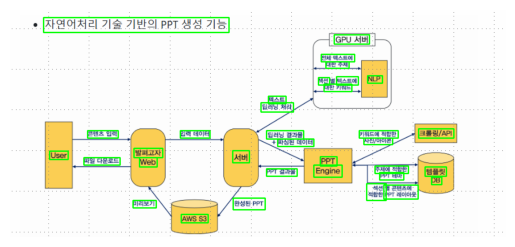

['자연어처리 .기술 기반의 PPT 생성 기능', 'GPU 서버', '전체 텍스트예', '대단 주시', '씩선', '텍스트에', 'NLP', '대한 키위드', '텍스트', '립러님. 처화', '근런초 입려', '입려 데이터', '덥리님 간과물', '기위드데 저갑한', '크불림/API', '파심) 데이터', '사진아이끈', 'User', "발펴고자'", '서버', '교일 다운로드', 'Web', 'PPr', 'PPT 결과물', 'Engine', '주제어 적답한', '템문렉', 'PPT 테야', 'DB', '표별::', "'라y택하이로:", '미리보기', '완성된: PPT', 'AWS S3']


In [ ]:
print(extract_text_from_image('/content/image2.PNG' ,showimages=True))

PDF에서 텍스트 추출

In [ ]:
print(extract_text_from_pdf('/content/test.pdf'))

1.사용자가웹에서배경제거, 해상도향상, 픽토그램화처리하고자하는이미지
를업로드한다.
2.사용자가START 버튼을누르면서버에서이미지를딥러닝처리한다.
3.사용자가완성된이미지를확인한후, 필요하다면선호도에맞추어세부사항
을조절하여이미지를다운로드한다.
1. 슬라이더기능을통해배경이제거되는정도를조절할수있다.
2. 돋보기기능을통해해상도의향상정도를비교분석할수있다.
1.사용자가웹에서PPT로만들고자하는콘텐츠를입력한다.
1. 제시된규칙에따라마크다운형식으로텍스트를입력한다.
2. 편리한GUI의에디터를제공하여누구나쉽게입력할수있게한다.
3. 사용자가필요하다면선택적으로이미지를입력한다.
2.사용자가변환하기버튼을누르면서버에서PPT를생성한다.
1. 텍스트콘텐츠에대해딥러닝분석을거친다.
2. 주제와어울리는테마를적용하고, 섹션별로내용에맞는레이아웃을결정하여슬라이드를구성한다.
3. 필요하다면각섹션의키워드를추출하여사진이나아이콘을추가한다.
3.사용자가선호하는PPT를다운로드한다.
1. 제공된다양한결과물들중사용자는원하는결과물을선택한다.
2. 완성된PPT 파일을다운로드받을수있는버튼을제공한다.



요약하기

In [ ]:
#  한번만 실행하기
model = AutoModelForSeq2SeqLM.from_pretrained('eenzeenee/t5-base-korean-summarization')
tokenizer = AutoTokenizer.from_pretrained('eenzeenee/t5-base-korean-summarization')

In [ ]:
txt = '''
여기에 요약할 텍스트를 입력하세요
'''
summarize_text(txt,model,tokenizer)

Overall Progress: 100%|███████████████████████████████████████████████| 3/3 [00:12<00:00,  4.09s/it]


'프로젝트보고서는 Markdown을 사용하여 문서를 작성하고 프롬프트를 활용하여 정확한 정보나 코드를 요청하는 방법을 학습하는 것을 목표로 한다.'